## Buiness Analysis graded assignment 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import io

In [3]:
data = pd.read_csv('Assignment-1.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CarID                         200 non-null    object 
 1   Number of Scratches           200 non-null    int64  
 2   Total scratch length (in mm)  200 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB


In [5]:
data.describe()

,Number of Scratches,Total scratch length (in mm)
count,200.000000,200.000000
mean,7.100000,3.002350
std,2.860228,0.510826
min,1.000000,1.630000
25%,5.000000,2.645000
50%,7.000000,3.045000
75%,9.000000,3.352500
max,18.000000,4.510000


In [6]:
data['Total scratch length (in mm)'].mode()

0    3.16
Name: Total scratch length (in mm), dtype: float64

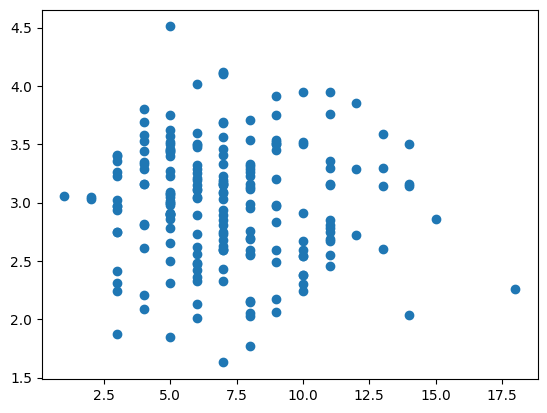

In [7]:
plt.scatter(x= data['Number of Scratches'], y= data['Total scratch length (in mm)'])

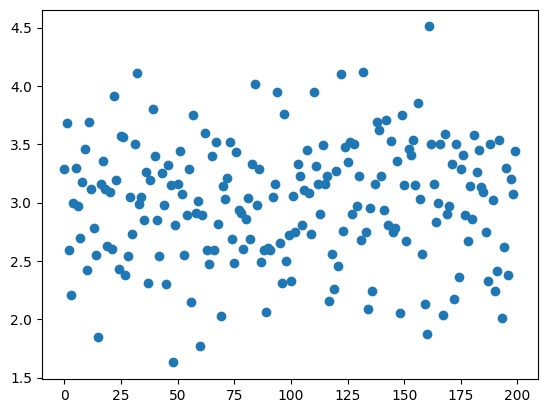

In [8]:
plt.scatter(x= [x for x in range(200)], y= data['Total scratch length (in mm)'] )

In [9]:
conting_tab = pd.crosstab(data['CarID'], data['Number of Scratches'], margins= True)

In [10]:
conting_tab

Number of Scratches,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,18,All
CarID,,,,,,,,,,,,,,,,,
CID0001,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
CID0002,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
CID0003,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
CID0004,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
CID0005,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CID0197,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
CID0198,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
CID0199,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


array([[<Axes: title={'center': 'Number of Scratches'}>]], dtype=object)

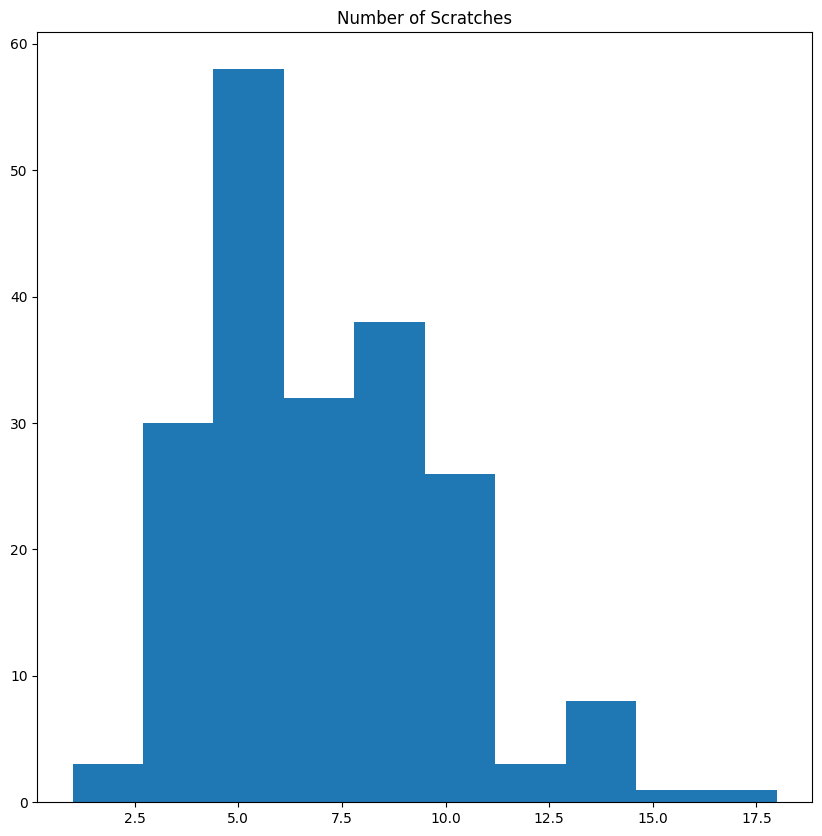

In [11]:
data.hist(grid= False, figsize= (10, 10), column= ['Number of Scratches'])

array([[<Axes: title={'center': 'Total scratch length (in mm)'}>]],
      dtype=object)

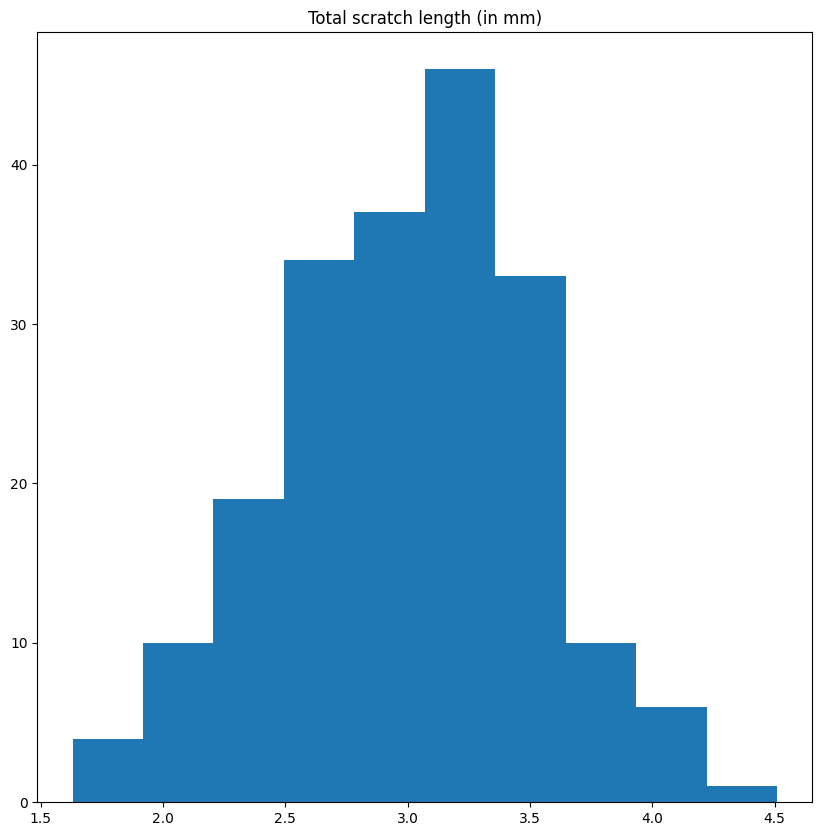

In [12]:
data.hist(grid= False, figsize= (10, 10), column= ['Total scratch length (in mm)'])

In [13]:
data.describe()

,Number of Scratches,Total scratch length (in mm)
count,200.000000,200.000000
mean,7.100000,3.002350
std,2.860228,0.510826
min,1.000000,1.630000
25%,5.000000,2.645000
50%,7.000000,3.045000
75%,9.000000,3.352500
max,18.000000,4.510000


### making data table for chi-square test

In [14]:
import statsmodels.api as sm
import scipy.stats as stats


In [15]:
stats_labels = ['mean_observed', 'variance observed', 'Skew observed', 'kurt observed']
stats_values_total_len = [data['Total scratch length (in mm)'].mean(), data['Total scratch length (in mm)'].var(), data['Total scratch length (in mm)'].skew(), data['Total scratch length (in mm)'].kurtosis()]

stats_values_total_count = [data['Number of Scratches'].mean(), data['Number of Scratches'].var(), data['Number of Scratches'].skew(), data['Number of Scratches'].kurtosis()]

stat_table = set(zip(stats_labels, stats_values_total_len, stats_values_total_count))
stat_table


{('Skew observed', -0.11388232208708189, 0.6975008644733138),
 ('kurt observed', -0.09976998878198406, 0.5891820210782952),
 ('mean_observed', 3.0023500000000003, 7.1),
 ('variance observed', 0.2609436959798995, 8.180904522613066)}

((array([-2.70069508, -2.39117927, -2.21476595, -2.08844273, -1.98865134,
         -1.90545091, -1.83366817, -1.77025272, -1.7132485 , -1.66132288,
         -1.61352545, -1.56915347, -1.52767212, -1.48866446, -1.45179889,
         -1.41680716, -1.38346902, -1.35160134, -1.32105008, -1.29168444,
         -1.26339229, -1.23607681, -1.20965371, -1.18404921, -1.1591983 ,
         -1.13504337, -1.11153314, -1.08862177, -1.06626803, -1.04443478,
         -1.02308837, -1.00219826, -0.9817366 , -0.96167793, -0.94199891,
         -0.9226781 , -0.90369573, -0.88503353, -0.86667459, -0.84860322,
         -0.83080482, -0.8132658 , -0.79597346, -0.77891592, -0.76208206,
         -0.74546144, -0.72904425, -0.71282124, -0.69678371, -0.68092342,
         -0.6652326 , -0.64970389, -0.63433029, -0.61910517, -0.60402223,
         -0.58907547, -0.57425918, -0.55956789, -0.5449964 , -0.53053972,
         -0.51619308, -0.50195192, -0.48781183, -0.47376862, -0.45981823,
         -0.44595676, -0.43218046, -0.

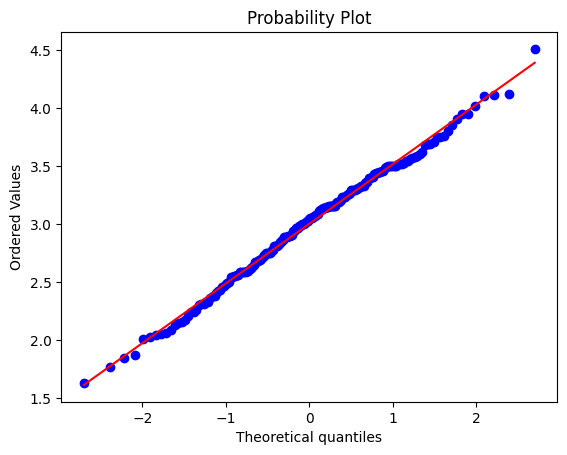

In [16]:
stats.probplot(data['Total scratch length (in mm)'], plot= plt)

((array([-2.70069508, -2.39117927, -2.21476595, -2.08844273, -1.98865134,
         -1.90545091, -1.83366817, -1.77025272, -1.7132485 , -1.66132288,
         -1.61352545, -1.56915347, -1.52767212, -1.48866446, -1.45179889,
         -1.41680716, -1.38346902, -1.35160134, -1.32105008, -1.29168444,
         -1.26339229, -1.23607681, -1.20965371, -1.18404921, -1.1591983 ,
         -1.13504337, -1.11153314, -1.08862177, -1.06626803, -1.04443478,
         -1.02308837, -1.00219826, -0.9817366 , -0.96167793, -0.94199891,
         -0.9226781 , -0.90369573, -0.88503353, -0.86667459, -0.84860322,
         -0.83080482, -0.8132658 , -0.79597346, -0.77891592, -0.76208206,
         -0.74546144, -0.72904425, -0.71282124, -0.69678371, -0.68092342,
         -0.6652326 , -0.64970389, -0.63433029, -0.61910517, -0.60402223,
         -0.58907547, -0.57425918, -0.55956789, -0.5449964 , -0.53053972,
         -0.51619308, -0.50195192, -0.48781183, -0.47376862, -0.45981823,
         -0.44595676, -0.43218046, -0.

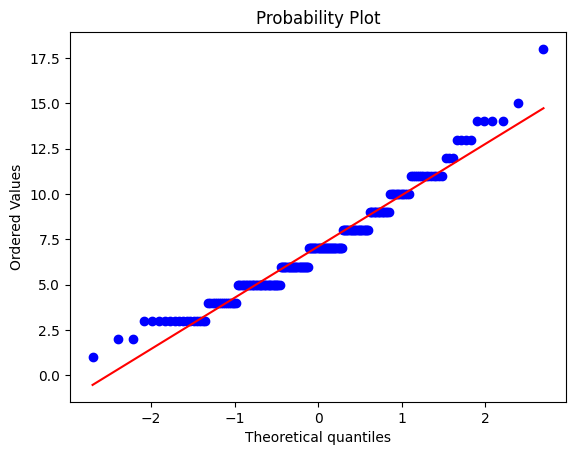

In [17]:
stats.probplot(data['Number of Scratches'], plot=plt)

((array([ 1.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
          3.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
          4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,  5.,  5.,
          5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
          5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
          6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
          6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,
          7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
          7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
          8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
          8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
          9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
          9.,  9.,  9.,  9.,  9.,  9.,  9.,  9., 10., 10., 10., 10., 10.,
         10., 10., 10., 10., 10., 10.,

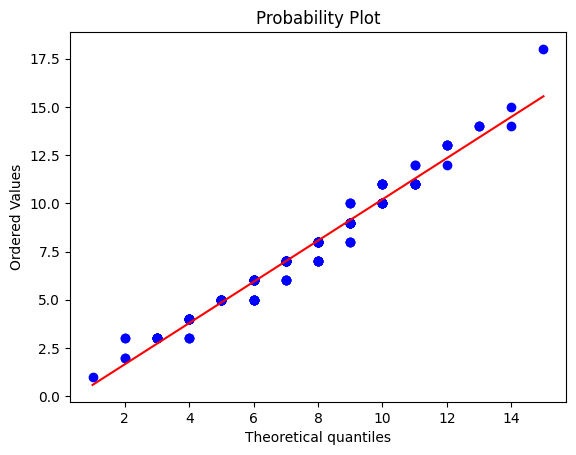

In [18]:
stats.probplot(data['Number of Scratches'], dist='poisson', plot=plt, sparams=(data['Number of Scratches'].mean()))

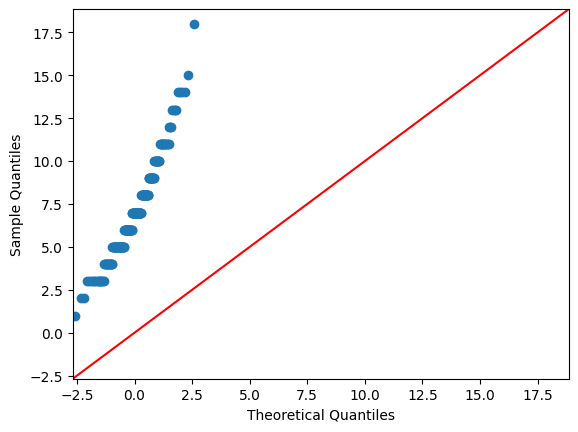

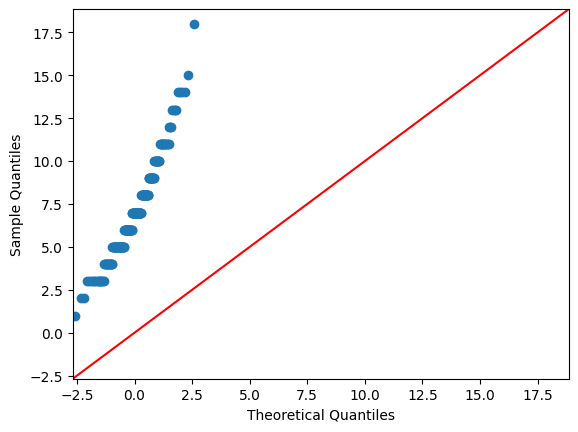

In [19]:
# plot qq plot from given data
sm.qqplot(data['Number of Scratches'], line='45')

In [20]:
grouped_data_num_of_scratches = pd.DataFrame()
grouped_data_num_of_scratches['Grouped number of scratches'] = data.groupby('Number of Scratches')['Number of Scratches'].count()
# grouped_data['Grouped total length of scratches'] = data.groupby('Total scratch length (in mm)')['Total scratch length (in mm)'].count()
grouped_data_num_of_scratches

,Grouped number of scratches
Number of Scratches,
1,1
2,2
3,15
4,15
5,32
6,26
7,32
8,23
9,15


In [21]:
grouped_data_num_of_scratches['prob of appearing'] = grouped_data_num_of_scratches['Grouped number of scratches'] / len(data)

In [22]:
grouped_data_num_of_scratches

,Grouped number of scratches,prob of appearing
Number of Scratches,,
1,1,0.005
2,2,0.010
3,15,0.075
4,15,0.075
5,32,0.160
6,26,0.130
7,32,0.160
8,23,0.115
9,15,0.075


In [23]:
from scipy import stats
from scipy.stats import poisson
from scipy.stats import chisquare

In [24]:
poisson.pmf

<bound method rv_discrete.pmf of <scipy.stats._discrete_distns.poisson_gen object at 0x7f1455b6b9d0>>

In [25]:
grouped_data_num_of_scratches['Poissio_PMF'] = poisson.pmf(grouped_data_num_of_scratches.index, mu= data['Number of Scratches'].mean())
grouped_data_num_of_scratches

,Grouped number of scratches,prob of appearing,Poissio_PMF
Number of Scratches,,,
1,1,0.005,0.005858
2,2,0.010,0.020797
3,15,0.075,0.049219
4,15,0.075,0.087364
5,32,0.160,0.124057
6,26,0.130,0.146800
7,32,0.160,0.148897
8,23,0.115,0.132146
9,15,0.075,0.104249


In [26]:
grouped_data_num_of_scratches['Possion_Freq'] = grouped_data_num_of_scratches['Poissio_PMF'] * len(data)
grouped_data_num_of_scratches

,Grouped number of scratches,prob of appearing,Poissio_PMF,Possion_Freq
Number of Scratches,,,,
1,1,0.005,0.005858,1.171649
2,2,0.010,0.020797,4.159354
3,15,0.075,0.049219,9.843804
4,15,0.075,0.087364,17.472753
5,32,0.160,0.124057,24.811309
6,26,0.130,0.146800,29.360049
7,32,0.160,0.148897,29.779478
8,23,0.115,0.132146,26.429287
9,15,0.075,0.104249,20.849771


In [27]:
grouped_data_num_of_scratches['Possion_Freq'] = [round(ele, 2) for ele in grouped_data_num_of_scratches['Possion_Freq']]
grouped_data_num_of_scratches

,Grouped number of scratches,prob of appearing,Poissio_PMF,Possion_Freq
Number of Scratches,,,,
1,1,0.005,0.005858,1.17
2,2,0.010,0.020797,4.16
3,15,0.075,0.049219,9.84
4,15,0.075,0.087364,17.47
5,32,0.160,0.124057,24.81
6,26,0.130,0.146800,29.36
7,32,0.160,0.148897,29.78
8,23,0.115,0.132146,26.43
9,15,0.075,0.104249,20.85


In [28]:
observed_frq = list(grouped_data_num_of_scratches['Grouped number of scratches'])
expected_frq = list(grouped_data_num_of_scratches['Possion_Freq'])
print(observed_frq, expected_frq, sep= '\n')

[1, 2, 15, 15, 32, 26, 32, 23, 15, 12, 14, 3, 4, 4, 1, 1]
[1.17, 4.16, 9.84, 17.47, 24.81, 29.36, 29.78, 26.43, 20.85, 14.8, 9.55, 5.65, 3.09, 1.57, 0.74, 0.05]


In [42]:
observed_frq = list(grouped_data_num_of_scratches['Grouped number of scratches'])
expected_frq = list(grouped_data_num_of_scratches['Possion_Freq'])
expected_frq = [round(ele, 2) for ele in expected_frq]
print(observed_frq, expected_frq, sep= '\n')
stats.chisquare(observed_frq, expected_frq )

[1, 2, 15, 15, 32, 26, 32, 23, 15, 12, 14, 3, 4, 4, 1, 1]
[1.17, 4.16, 9.84, 17.47, 24.81, 29.36, 29.78, 26.43, 20.85, 14.8, 9.55, 5.65, 3.09, 1.57, 0.74, 0.05]


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.0034115994380895386

### starting the number of stats for length of scratches

### creating bins in the grouped data

In [30]:
data.describe()

,Number of Scratches,Total scratch length (in mm)
count,200.000000,200.000000
mean,7.100000,3.002350
std,2.860228,0.510826
min,1.000000,1.630000
25%,5.000000,2.645000
50%,7.000000,3.045000
75%,9.000000,3.352500
max,18.000000,4.510000


In [31]:
grouped_data_len_of_scretches = pd.DataFrame()
interval = (data['Total scratch length (in mm)'].max() - data['Total scratch length (in mm)'].min()) /  8 ## already given question
print(interval)
grouped_data_len_of_scretches['Group interval'] = [data['Total scratch length (in mm)'].min() + (interval * x) for x in range(1, 9)]
grouped_data_len_of_scretches

0.36


,Group interval
0,1.99
1,2.35
2,2.71
3,3.07
4,3.43
5,3.79
6,4.15
7,4.51


In [32]:
grouped_data_len_of_scretches['cumulative_freq'] = [data['Total scratch length (in mm)'][data['Total scratch length (in mm)'] <= x ].count() for x in grouped_data_len_of_scretches['Group interval']]
grouped_data_len_of_scretches 

,Group interval,cumulative_freq
0,1.99,4
1,2.35,23
2,2.71,57
3,3.07,106
4,3.43,156
5,3.79,190
6,4.15,199
7,4.51,200


In [33]:
l = []
for i in range(len(grouped_data_len_of_scretches['cumulative_freq'])):
    if i == 0:
        l.append(grouped_data_len_of_scretches['cumulative_freq'][i])
    else:
        l.append(grouped_data_len_of_scretches['cumulative_freq'][i] - grouped_data_len_of_scretches['cumulative_freq'][i-1])

grouped_data_len_of_scretches['observed freq']  = pd.DataFrame(l)
grouped_data_len_of_scretches

,Group interval,cumulative_freq,observed freq
0,1.99,4,4
1,2.35,23,19
2,2.71,57,34
3,3.07,106,49
4,3.43,156,50
5,3.79,190,34
6,4.15,199,9
7,4.51,200,1


In [34]:
## cumputing probability of getting values  len then 2.713856 
prob = data['Total scratch length (in mm)'][data['Total scratch length (in mm)'] < 2.713856 ].count() / len(data)
prob

0.285

In [35]:
grouped_data_len_of_scretches['cum prob'] = [data['Total scratch length (in mm)'][data['Total scratch length (in mm)'] <= x ].count() / len(data) for x in grouped_data_len_of_scretches['Group interval']]
grouped_data_len_of_scretches

,Group interval,cumulative_freq,observed freq,cum prob
0,1.99,4,4,0.020
1,2.35,23,19,0.115
2,2.71,57,34,0.285
3,3.07,106,49,0.530
4,3.43,156,50,0.780
5,3.79,190,34,0.950
6,4.15,199,9,0.995
7,4.51,200,1,1.000


In [36]:
l = []
for i in range(len(grouped_data_len_of_scretches['cum prob'])):
    if i == 0:
        l.append(grouped_data_len_of_scretches['cum prob'][i])
    else:
        l.append(grouped_data_len_of_scretches['cum prob'][i] - grouped_data_len_of_scretches['cum prob'][i-1])
grouped_data_len_of_scretches['observed prob'] = pd.DataFrame(l)
grouped_data_len_of_scretches

,Group interval,cumulative_freq,observed freq,cum prob,observed prob
0,1.99,4,4,0.020,0.020
1,2.35,23,19,0.115,0.095
2,2.71,57,34,0.285,0.170
3,3.07,106,49,0.530,0.245
4,3.43,156,50,0.780,0.250
5,3.79,190,34,0.950,0.170
6,4.15,199,9,0.995,0.045
7,4.51,200,1,1.000,0.005


In [37]:
stats.chisquare(grouped_data_len_of_scretches['observed freq'])

Power_divergenceResult(statistic=106.88, pvalue=4.071911260683816e-20)

In [38]:
expected_value = sum([x * y for x, y in zip(grouped_data_len_of_scretches['observed prob'], grouped_data_len_of_scretches['observed freq'])]) 
expected_value

38.36000000000001

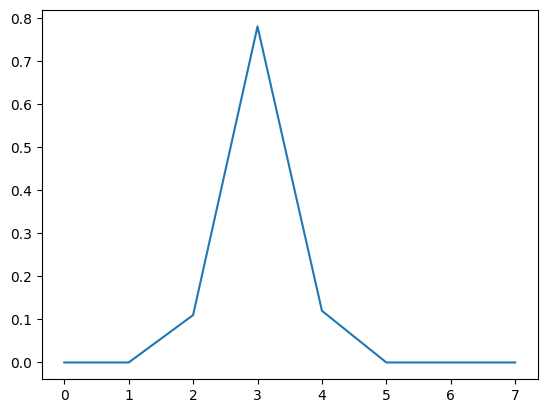

In [39]:
normal_pmf = stats.norm.pdf(x= grouped_data_len_of_scretches.index, loc= data['Total scratch length (in mm)'].mean(), scale= data['Total scratch length (in mm)'].std())
normal_pmf = [round(ele, 2) for ele in normal_pmf]
plt.plot(normal_pmf)

In [40]:
grouped_data_len_of_scretches['normal_pmf'] = normal_pmf
grouped_data_len_of_scretches['expected freq'] = grouped_data_len_of_scretches['normal_pmf'] * len(data)
grouped_data_len_of_scretches['expected freq'] = [round(ele, 2) for ele in grouped_data_len_of_scretches['expected freq']]
grouped_data_len_of_scretches

,Group interval,cumulative_freq,observed freq,cum prob,observed prob,normal_pmf,expected freq
0,1.99,4,4,0.020,0.020,0.00,0.0
1,2.35,23,19,0.115,0.095,0.00,0.0
2,2.71,57,34,0.285,0.170,0.11,22.0
3,3.07,106,49,0.530,0.245,0.78,156.0
4,3.43,156,50,0.780,0.250,0.12,24.0
5,3.79,190,34,0.950,0.170,0.00,0.0
6,4.15,199,9,0.995,0.045,0.00,0.0
7,4.51,200,1,1.000,0.005,0.00,0.0


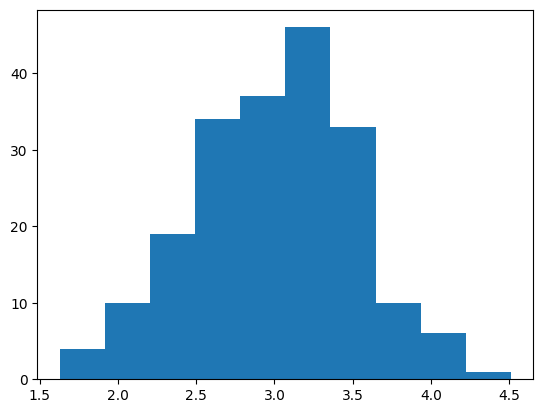

In [41]:

# plt.plot( grouped_data_len_of_scretches['expected freq']) 
hist_plt = plt.hist(data['Total scratch length (in mm)'])